# Text Data Loading, Creating a DataFrame

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import os
from textblob import TextBlob
import datetime as dt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [4]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [46]:
# Import csv file into a dataframe
df_15m = pd.read_csv('./Resources/fifteen_min_for_sixty_day.csv')

In [48]:
# convert the timezone to CST
df_15m['Datetime'] = pd.to_datetime(df_15m['Datetime'], utc=True)
df_15m['Datetime'] = pd.DatetimeIndex(df_15m['Datetime']).tz_convert('US/Central')
# rename the column 'Datetime'
df_15m = df_15m.rename(columns = {'Datetime':'date'})

In [49]:
df_15m.head()

date        Open        High         Low       Close   Adj Close   Volume
0 2020-07-22 08:30:00-05:00  319.799988  325.283997  316.639984  318.320007  318.320007  1639907
1 2020-07-22 08:45:00-05:00  318.398010  321.898010  317.620117  320.765991  320.765991   562159
2 2020-07-22 09:00:00-05:00  320.798004  321.795990  318.564240  319.756012  319.756012   425523
3 2020-07-22 09:15:00-05:00  319.812012  320.200012  317.000000  317.351990  317.351990   357633
4 2020-07-22 09:30:00-05:00  317.174011  318.970001  316.600189  317.200012  317.200012   308357

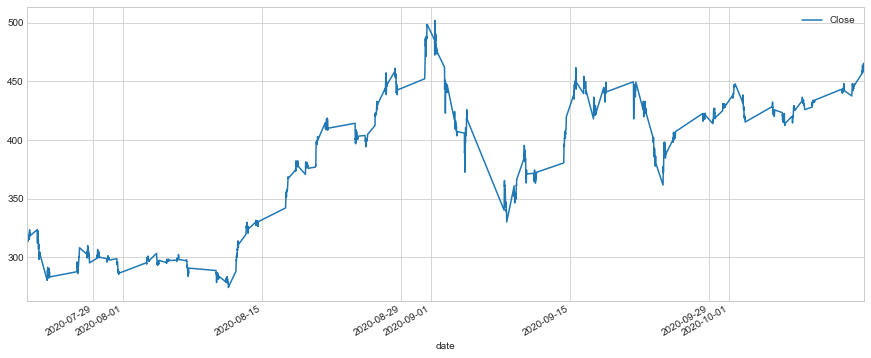

In [50]:
df_15m.plot(x='date', y='Close', figsize=(15,6));

In [51]:
# Import a text file to analyze
df_tsla = pd.read_csv('./Resources/concat_query_tesla_price_final.csv')
df_tsla.head()

date                                               text  Subjectivity  Polarity  Analysis
0  2020-10-13 14:26:07-05:00  why get a model s perf to drive around alone w...      0.750000  0.450000  Positive
1  2020-10-13 14:20:59-05:00  on ann: nhtsa probes fires in certain chevy bo...      0.512987  0.175325  Positive
2  2020-10-13 14:20:53-05:00  would love a tesla. out of my price range atm ...      0.600000  0.500000  Positive
3  2020-10-13 14:12:40-05:00  tesla cuts model s price by $3,000 amid sales ...      0.000000  0.000000   Neutral
4  2020-10-13 14:07:47-05:00  i hate days like this, where my tesla news fee...      0.500000 -0.205000  Negative

In [52]:
df_tsla['date'] = pd.to_datetime(df_tsla['date'], utc=True)
df_tsla['date'] = pd.DatetimeIndex(df_tsla['date']).tz_convert('US/Central')

In [53]:
df_tsla = df_tsla.sort_values('date', ascending = True)
df_tsla = df_tsla.reset_index(drop=True)
df_tsla.head()

date                                               text  Subjectivity  Polarity  Analysis
0 2020-05-01 00:00:37-05:00  being in the s&p means s&p index stock funds *...          0.15      -0.2  Negative
1 2020-05-01 00:05:33-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral
2 2020-05-01 00:07:22-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral
3 2020-05-01 00:30:45-05:00  tesla vp explains why china-made model 3 drops...          0.00       0.0   Neutral
4 2020-05-01 00:31:01-05:00  tesla cuts price for china-made model 3 cars b...          0.00       0.0   Neutral

In [54]:
# dropping dates before 2020-07-20
df_tsla = df_tsla[df_tsla['date'] > '2020-07-20']

## Labelling price increase or decrease by interval

In [55]:
# df_daily['daily return'] = df_daily['Close'].pct_change()
df_15m['15min return'] = df_15m['Close'].pct_change()

In [56]:
df_15m.head()

date        Open        High         Low       Close   Adj Close   Volume  15min return
0 2020-07-22 08:30:00-05:00  319.799988  325.283997  316.639984  318.320007  318.320007  1639907           NaN
1 2020-07-22 08:45:00-05:00  318.398010  321.898010  317.620117  320.765991  320.765991   562159      0.007684
2 2020-07-22 09:00:00-05:00  320.798004  321.795990  318.564240  319.756012  319.756012   425523     -0.003149
3 2020-07-22 09:15:00-05:00  319.812012  320.200012  317.000000  317.351990  317.351990   357633     -0.007518
4 2020-07-22 09:30:00-05:00  317.174011  318.970001  316.600189  317.200012  317.200012   308357     -0.000479

In [57]:
# Or add a column with binary number.
def getBinary(score):
    if score <= 0:
        return 0
    else:
        return 1

df_15m['tick'] = df_15m['15min return'].apply(getBinary)
df_15m.head(10)

date        Open        High         Low       Close   Adj Close   Volume  15min return  tick
0 2020-07-22 08:30:00-05:00  319.799988  325.283997  316.639984  318.320007  318.320007  1639907           NaN     1
1 2020-07-22 08:45:00-05:00  318.398010  321.898010  317.620117  320.765991  320.765991   562159      0.007684     1
2 2020-07-22 09:00:00-05:00  320.798004  321.795990  318.564240  319.756012  319.756012   425523     -0.003149     0
3 2020-07-22 09:15:00-05:00  319.812012  320.200012  317.000000  317.351990  317.351990   357633     -0.007518     0
4 2020-07-22 09:30:00-05:00  317.174011  318.970001  316.600189  317.200012  317.200012   308357     -0.000479     0
5 2020-07-22 09:45:00-05:00  317.464325  317.778015  312.399994  314.821991  314.821991   613666     -0.007497     0
6 2020-07-22 10:00:00-05:00  314.891998  315.971985  312.910004  313.325989  313.325989   364568     -0.004752     0
7 2020-07-22 10:15:00-05:00  313.332703  316.837982  313.244019  316.834015  316.834015   333205      0.011196     1
8 2020-07-22 10:30:00-05:00  316.954010  318.799988  316.324524  317.649994  317.649994   484279      0.002575     1
9 2020-07-22 10:45:00-05:00  317.596008  318.399994  316.221985  316.622009  316.622009   244154     -0.003236     0

In [65]:
df_15m['date only'] = df_15m['date'].dt.date
# df_hourly['year'] = df_hourly['date'].dt.year
# df_hourly['month'] = df_hourly['date'].dt.month
# df_hourly['day'] = df_hourly['date'].dt.day
df_15m['hour'] = df_15m['date'].dt.hour
df_15m['minute'] = df_15m['date'].dt.minute
df_15m

date        Open        High         Low       Close   Adj Close    Volume  15min return  tick   date only  hour  minute
0    2020-07-22 08:30:00-05:00  319.799988  325.283997  316.639984  318.320007  318.320007   1639907           NaN     1  2020-07-22     8      30
1    2020-07-22 08:45:00-05:00  318.398010  321.898010  317.620117  320.765991  320.765991    562159      0.007684     1  2020-07-22     8      45
2    2020-07-22 09:00:00-05:00  320.798004  321.795990  318.564240  319.756012  319.756012    425523     -0.003149     0  2020-07-22     9       0
3    2020-07-22 09:15:00-05:00  319.812012  320.200012  317.000000  317.351990  317.351990    357633     -0.007518     0  2020-07-22     9      15
4    2020-07-22 09:30:00-05:00  317.174011  318.970001  316.600189  317.200012  317.200012    308357     -0.000479     0  2020-07-22     9      30
5    2020-07-22 09:45:00-05:00  317.464325  317.778015  312.399994  314.821991  314.821991    613666     -0.007497     0  2020-07-22     9      45
6    2020-07-22 10:00:00-05:00  314.891998  315.971985  312.910004  313.325989  313.325989    364568     -0.004752     0  2020-07-22    10       0
7    2020-07-22 10:15:00-05:00  313.332703  316.837982  313.244019  316.834015  316.834015    333205      0.011196     1  2020-07-22    10      15
8    2020-07-22 10:30:00-05:00  316.954010  318.799988  316.324524  317.649994  317.649994    484279      0.002575     1  2020-07-22    10      30
9    2020-07-22 10:45:00-05:00  317.596008  318.399994  316.221985  316.622009  316.622009    244154     -0.003236     0  2020-07-22    10      45
10   2020-07-22 11:00:00-05:00  316.763977  317.197998  314.824005  316.800018  316.800018    255909      0.000562     1  2020-07-22    11       0
11   2020-07-22 11:15:00-05:00  316.841614  317.953979  316.041199  317.595001  317.595001    249236      0.002509     1  2020-07-22    11      15
12   2020-07-22 11:30:00-05:00  317.611969  317.821960  316.799988  317.408020  317.408020    142650     -0.000589     0  2020-07-22    11      30
13   2020-07-22 11:45:00-05:00  317.408020  317.428009  315.739105  317.026001  317.026001    167074     -0.001204     0  2020-07-22    11      45
14   2020-07-22 12:00:00-05:00  316.996002  317.429993  316.500000  317.115997  317.115997    155990      0.000284     1  2020-07-22    12       0
15   2020-07-22 12:15:00-05:00  317.169983  317.954010  316.912842  317.539978  317.539978    200801      0.001337     1  2020-07-22    12      15
16   2020-07-22 12:30:00-05:00  317.600006  317.858002  316.261017  317.170990  317.170990    220724     -0.001162     0  2020-07-22    12      30
17   2020-07-22 12:45:00-05:00  317.343994  317.600006  315.119995  315.400024  315.400024    235676     -0.005584     0  2020-07-22    12      45
18   2020-07-22 13:00:00-05:00  315.549164  316.179993  315.022003  315.691345  315.691345    223055      0.000924     1  2020-07-22    13       0
19   2020-07-22 13:15:00-05:00  315.697998  316.309998  314.418030  315.276001  315.276001    184661     -0.001316     0  2020-07-22    13      15
20   2020-07-22 13:30:00-05:00  315.325989  316.934021  314.022034  316.849182  316.849182    296542      0.004990     1  2020-07-22    13      30
21   2020-07-22 13:45:00-05:00  316.806000  321.315979  316.167999  320.292023  320.292023    677980      0.010866     1  2020-07-22    13      45
22   2020-07-22 14:00:00-05:00  320.400665  323.547974  320.334015  323.332001  323.332001    875870      0.009491     1  2020-07-22    14       0
23   2020-07-22 14:15:00-05:00  323.313995  323.313995  318.204010  318.204010  318.204010    690231     -0.015860     0  2020-07-22    14      15
24   2020-07-22 14:30:00-05:00  318.182007  321.000000  318.058014  320.707184  320.707184    571932      0.007867     1  2020-07-22    14      30
25   2020-07-22 14:45:00-05:00  320.717987  320.940002  316.903992  318.115997  318.115997    879595     -0.008080     0  2020-07-22    14      45
26   2020-07-23 08:30:00-05:00  335.789978  337.799988  3

### Text dataframe processing

In [73]:
df_tsla['date only'] = df_tsla['date'].dt.date
df_tsla['hour'] = df_tsla['date'].dt.hour
df_tsla['minute'] = df_tsla['date'].dt.floor(freq='15T').dt.minute

In [74]:
df_tsla

date                                               text  Subjectivity      Polarity  Analysis   date only  hour  minute
19229 2020-07-20 00:04:49-05:00  i think many @nikolatrevor are looking forward...      0.312500  2.500000e-01  Positive  2020-07-20     0       0
19230 2020-07-20 00:09:00-05:00  customers are inevitably paying for the full p...      0.508333  1.500000e-01  Positive  2020-07-20     0       0
19231 2020-07-20 00:16:32-05:00  bitcoin could see an extremely strong rally af...      0.527778  1.277778e-01  Positive  2020-07-20     0      15
19232 2020-07-20 00:39:24-05:00  @elonmusk canada needs tesla m3 lr rwd. bring ...      0.367143  2.171429e-01  Positive  2020-07-20     0      30
19233 2020-07-20 01:39:42-05:00  and, of course, your car will be able to buy a...      0.625000  5.000000e-01  Positive  2020-07-20     1      30
19234 2020-07-20 01:43:28-05:00  citigroup increases tesla $tsla price target t...      0.000000  0.000000e+00   Neutral  2020-07-20     1      30
19235 2020-07-20 02:04:45-05:00  i compliment how great their (lower cost) ice ...      0.420833  1.527778e-01  Positive  2020-07-20     2       0
19236 2020-07-20 02:08:05-05:00  thanks for helping the share price bro!! parts...      0.254167  1.562500e-02  Positive  2020-07-20     2       0
19237 2020-07-20 02:16:33-05:00  if lucky tesla goes flat this, and next year. ...      0.433532  1.561508e-01  Positive  2020-07-20     2      15
19238 2020-07-20 03:21:04-05:00  not true. matthias went on record claiming tes...      0.425000  2.500000e-02  Positive  2020-07-20     3      15
19239 2020-07-20 03:22:06-05:00  everyone was acting like @elonmusk was a fool ...      0.304815 -4.509259e-02  Negative  2020-07-20     3      15
19240 2020-07-20 03:33:46-05:00  don agree. can also be in this price point tha...      0.600000  4.625000e-01  Positive  2020-07-20     3      30
19241 2020-07-20 03:34:33-05:00  tesla stock price. isin: us88160r1014 | symbol...      0.275000  1.750000e-01  Positive  2020-07-20     3      30
19242 2020-07-20 03:37:58-05:00  that why value traps exist..\n\nthey can be us...      0.750000  0.000000e+00   Neutral  2020-07-20     3      30
19243 2020-07-20 03:47:40-05:00  whatever happens this is my last week holding ...      0.533333 -5.000000e-01  Negative  2020-07-20     3      45
19244 2020-07-20 04:00:00-05:00  tesla slashes model y suv price as pandemic we...      0.000000  0.000000e+00   Neutral  2020-07-20     4       0
19245 2020-07-20 04:33:08-05:00  but the porsche is multiple times the price of...      0.000000  0.000000e+00   Neutral  2020-07-20     4      30
19246 2020-07-20 04:41:33-05:00  tesla share price: what to expect from q2 resu...      0.000000  0.000000e+00   Neutral  2020-07-20     4      30
19247 2020-07-20 05:06:55-05:00  4. declining costs- do you really think tesla ...      0.383333  3.625000e-01  Positive  2020-07-20     5       0
19248 2020-07-20 05:10:16-05:00  new article: "tesla share price: what to expec...      0.454545  1.363636e-01  Positive  2020-07-20     5       0
19249 2020-07-20 05:25:39-05:00  they also lowered the price and activated leas...      0.383333  1.000000e-01  Positive  2020-07-20     5      15
19250 2020-07-20 05:51:30-05:00  fun fact: the earth's oceans contain ,   of li...      0.575000  4.500000e-01  Positive  2020-07-20     5      45
19251 2020-07-20 05:57:07-05:00  kenya! a 2012 jeep almost the same price as a ...      0.125000  0.000000e+00   Neutral  2020-07-20     5      45
19252 2020-07-20 05:59:13-05:00  i'm now an investor in tesla after months of d...      0.300000  2.083333e-02  Positive  2020-07-20     5      45
19253 2020-07-20 06:08:16-05:00  given the price ceiling on lithium the questio...      0.709524 -9.523810e-02  Negative  2020-07-20     6       0
19254 2020-07-20 06:13:40-05:00  tesla's constructive suggestions on share pric...      0.000000  0.000000e+00   Neutral  2020-07-20     6       0
19255 2020-07-20 06:24:09-05:00                           

## Merging Dataframes

In [75]:
# Merging the dataframes by using reduce function
from functools import reduce
data_frames = [df_tsla, df_15m]
df = reduce(lambda  left,right: pd.merge(left,right,on=['date only', 'hour','minute'],
                                            how='outer'), data_frames)
df

date_x                                               text  Subjectivity  Polarity  Analysis   date only  hour  minute                    date_y        Open        High         Low       Close   Adj Close     Volume  15min return  tick
0     2020-07-20 00:04:49-05:00  i think many @nikolatrevor are looking forward...      0.312500  0.250000  Positive  2020-07-20     0       0                       NaT         NaN         NaN         NaN         NaN         NaN        NaN           NaN   NaN
1     2020-07-20 00:09:00-05:00  customers are inevitably paying for the full p...      0.508333  0.150000  Positive  2020-07-20     0       0                       NaT         NaN         NaN         NaN         NaN         NaN        NaN           NaN   NaN
2     2020-07-20 00:16:32-05:00  bitcoin could see an extremely strong rally af...      0.527778  0.127778  Positive  2020-07-20     0      15                       NaT         NaN         NaN         NaN         NaN         NaN        NaN           NaN   NaN
3     2020-07-20 00:39:24-05:00  @elonmusk canada needs tesla m3 lr rwd. bring ...      0.367143  0.217143  Positive  2020-07-20     0      30                       NaT         NaN         NaN         NaN         NaN         NaN        NaN           NaN   NaN
4     2020-07-20 01:39:42-05:00  and, of course, your car will be able to buy a...      0.625000  0.500000  Positive  2020-07-20     1      30                       NaT         NaN         NaN         NaN         NaN         NaN        NaN           NaN   NaN
5     2020-07-20 01:43:28-05:00  citigroup increases tesla $tsla price target t...      0.000000  0.000000   Neutral  2020-07-20     1      30                       NaT         NaN         NaN         NaN         NaN         NaN        NaN           NaN   NaN
6     2020-07-20 02:04:45-05:00  i compliment how great their (lower cost) ice ...      0.420833  0.152778  Positive  2020-07-20     2       0                       NaT         NaN         NaN         NaN         NaN         NaN        NaN           NaN   NaN
7     2020-07-20 02:08:05-05:00  thanks for helping the share price bro!! parts...      0.254167  0.015625  Positive  2020-07-20     2       0                       NaT         NaN         NaN         NaN         NaN         NaN        NaN           NaN   NaN
8     2020-07-20 02:16:33-05:00  if lucky tesla goes flat this, and next year. ...      0.433532  0.156151  Positive  2020-07-20     2      15                       NaT         NaN         NaN         NaN         NaN         NaN        NaN           NaN   NaN
9     2020-07-20 03:21:04-05:00  not true. matthias went on record claiming tes...      0.425000  0.025000  Positive  2020-07-20     3      15                       NaT         NaN         NaN         NaN         NaN         NaN        NaN           NaN   NaN
10    2020-07-20 03:22:06-05:00  everyone was acting like @elonmusk was a fool ...      0.304815 -0.045093  Negative  2020-07-20     3      15                       NaT         NaN         NaN         NaN         NaN         NaN        NaN           NaN   NaN
11    2020-07-20 03:33:46-05:00  don agree. can also be in this price point tha...      0.600000  0.462500  Positive  2020-07-20     3      30                       NaT         NaN         NaN         NaN         NaN         NaN        NaN           NaN   NaN
12    2020-07-20 03:34:33-05:00  tesla stock price. isin: us88160r1014 | symbol...      0.275000  0.175000  Positive  2020-07-20     3      30                       NaT         NaN         NaN         NaN         NaN         NaN        NaN           NaN   NaN
13    2020-07-20 03:37:58-05:00  that why value traps exist..\n\nthey can be us...      0.750000  0.000000   Neutral  2020-07-20     3      30                       NaT         NaN         NaN         NaN         NaN         NaN        NaN           NaN   NaN
14    2020-07-20 03:47:40-05:00  whatever happens this is my last week holding ...      0.533333 -0.500000  Negative  2020-07

In [76]:
# Drop unnecessary columns
df = df.drop(columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Volume'])

In [77]:
df['date only'] = pd.to_datetime(df['date only'])

In [79]:
df = df[['date only', 'hour', 'minute', 'Close', '15min return', 'tick','text', 'Subjectivity', 'Polarity', 'Analysis', 'date_x','date_y']]

In [80]:
df = df.sort_values(['date only', 'hour', 'minute'], ascending=True)

In [81]:
df

date only  hour  minute       Close  15min return  tick                                               text  Subjectivity      Polarity  Analysis                    date_x                    date_y
0     2020-07-20     0       0         NaN           NaN   NaN  i think many @nikolatrevor are looking forward...      0.312500  2.500000e-01  Positive 2020-07-20 00:04:49-05:00                       NaT
1     2020-07-20     0       0         NaN           NaN   NaN  customers are inevitably paying for the full p...      0.508333  1.500000e-01  Positive 2020-07-20 00:09:00-05:00                       NaT
2     2020-07-20     0      15         NaN           NaN   NaN  bitcoin could see an extremely strong rally af...      0.527778  1.277778e-01  Positive 2020-07-20 00:16:32-05:00                       NaT
3     2020-07-20     0      30         NaN           NaN   NaN  @elonmusk canada needs tesla m3 lr rwd. bring ...      0.367143  2.171429e-01  Positive 2020-07-20 00:39:24-05:00                       NaT
4     2020-07-20     1      30         NaN           NaN   NaN  and, of course, your car will be able to buy a...      0.625000  5.000000e-01  Positive 2020-07-20 01:39:42-05:00                       NaT
5     2020-07-20     1      30         NaN           NaN   NaN  citigroup increases tesla $tsla price target t...      0.000000  0.000000e+00   Neutral 2020-07-20 01:43:28-05:00                       NaT
6     2020-07-20     2       0         NaN           NaN   NaN  i compliment how great their (lower cost) ice ...      0.420833  1.527778e-01  Positive 2020-07-20 02:04:45-05:00                       NaT
7     2020-07-20     2       0         NaN           NaN   NaN  thanks for helping the share price bro!! parts...      0.254167  1.562500e-02  Positive 2020-07-20 02:08:05-05:00                       NaT
8     2020-07-20     2      15         NaN           NaN   NaN  if lucky tesla goes flat this, and next year. ...      0.433532  1.561508e-01  Positive 2020-07-20 02:16:33-05:00                       NaT
9     2020-07-20     3      15         NaN           NaN   NaN  not true. matthias went on record claiming tes...      0.425000  2.500000e-02  Positive 2020-07-20 03:21:04-05:00                       NaT
10    2020-07-20     3      15         NaN           NaN   NaN  everyone was acting like @elonmusk was a fool ...      0.304815 -4.509259e-02  Negative 2020-07-20 03:22:06-05:00                       NaT
11    2020-07-20     3      30         NaN           NaN   NaN  don agree. can also be in this price point tha...      0.600000  4.625000e-01  Positive 2020-07-20 03:33:46-05:00                       NaT
12    2020-07-20     3      30         NaN           NaN   NaN  tesla stock price. isin: us88160r1014 | symbol...      0.275000  1.750000e-01  Positive 2020-07-20 03:34:33-05:00                       NaT
13    2020-07-20     3      30         NaN           NaN   NaN  that why value traps exist..\n\nthey can be us...      0.750000  0.000000e+00   Neutral 2020-07-20 03:37:58-05:00                       NaT
14    2020-07-20     3      45         NaN           NaN   NaN  whatever happens this is my last week holding ...      0.533333 -5.000000e-01  Negative 2020-07-20 03:47:40-05:00                       NaT
15    2020-07-20     4       0         NaN           NaN   NaN  tesla slashes model y suv price as pandemic we...      0.000000  0.000000e+00   Neutral 2020-07-20 04:00:00-05:00                       NaT
16    2020-07-20     4      30         NaN           NaN   NaN  but the porsche is multiple times the price of...      0.000000  0.000000e+00   Neutral 2020-07-20 04:33:08-05:00                       NaT
17    2020-07-20     4      30         NaN           NaN   NaN  tesla share price: what to expect from q2 resu...      0.000000  0.000000e+00   Neutral 2020-07-20 04:41:33-05:00                       NaT
18    2020-07-20     5       0         NaN           NaN   NaN  4. declining costs- do you really think tesla ...      0.383333  3.

In [27]:
# df.to_csv('./Resources/elonmusk_tweets_hourly_price.csv', index=False)

In [82]:
df_data = df.copy()

## Analysis

### Things to be considered
- What sentiment score should we use?    
  (Subjectivity or Polarity, or both combined - weighting on Polarity score with more objective one)    
- Which score value should we use to represent the same hourly(or daily) window, in case of having multiple scores?    
  (mean, count, add, take the first one or the last one, etc)   
- How to deal with texts generated off market hours including weekends?   
  (dropping them out or tagging them the same (up and down) ticker with the most recent one etc)   
 
 

### 1. Using various sentiment score(Polarity only) for all texts regardless of market hour. 

In [83]:
# take the average polarity scores in the same hour window.
df_mean = df.groupby(['date only', 'hour', 'minute']).mean()
df_sum = df.groupby(['date only', 'hour', 'minute']).sum()
df_count = df.groupby(['date only', 'hour', 'minute']).count()
df_first = df.groupby(['date only', 'hour', 'minute']).first()
df_last = df.groupby(['date only', 'hour', 'minute']).last()
df_data = df_mean.copy()

In [84]:
df_data = df_data.rename(columns = {'Polarity':'polarity mean'})
df_data['polarity sum'] = df_sum['Polarity']
df_data['polarity count'] = df_count['Polarity']
df_data['polarity first'] = df_first['Polarity']
df_data['polarity last'] = df_last['Polarity']
df_data.head()

Close  15min return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last
date only  hour minute                                                                                                                     
2020-07-20 0    0         NaN           NaN   NaN      0.410417       0.200000      0.400000               2        0.250000       0.150000
                15        NaN           NaN   NaN      0.527778       0.127778      0.127778               1        0.127778       0.127778
                30        NaN           NaN   NaN      0.367143       0.217143      0.217143               1        0.217143       0.217143
           1    30        NaN           NaN   NaN      0.312500       0.250000      0.500000               2        0.500000       0.000000
           2    0         NaN           NaN   NaN      0.337500       0.084201      0.168403               2        0.152778       0.015625

In [86]:
df_data['polarity mean change'] = df_data['polarity mean'].pct_change()
df_data['polarity sum change'] = df_data['polarity sum'].pct_change()
df_data['polarity count change'] = df_data['polarity count'].pct_change()
df_data['polarity first change'] = df_data['polarity first'].pct_change()
df_data['polarity last change'] = df_data['polarity last'].pct_change()
df_data.head()

Close  15min return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour minute                                                                                                                                                                                                                                    
2020-07-20 0    0         NaN           NaN   NaN      0.410417       0.200000      0.400000               2        0.250000       0.150000                   NaN                  NaN                    NaN                    NaN                   NaN
                15        NaN           NaN   NaN      0.527778       0.127778      0.127778               1        0.127778       0.127778             -0.361111            -0.680556                   -0.5              -0.488889             -0.148148
                30        NaN           NaN   NaN      0.367143       0.217143      0.217143               1        0.217143       0.217143              0.699379             0.699379                    0.0               0.699379              0.699379
           1    30        NaN           NaN   NaN      0.312500       0.250000      0.500000               2        0.500000       0.000000              0.151316             1.302632                    1.0               1.302632             -1.000000
           2    0         NaN           NaN   NaN      0.337500       0.084201      0.168403               2        0.152778       0.015625             -0.663194            -0.663194                    0.0              -0.694444                   inf

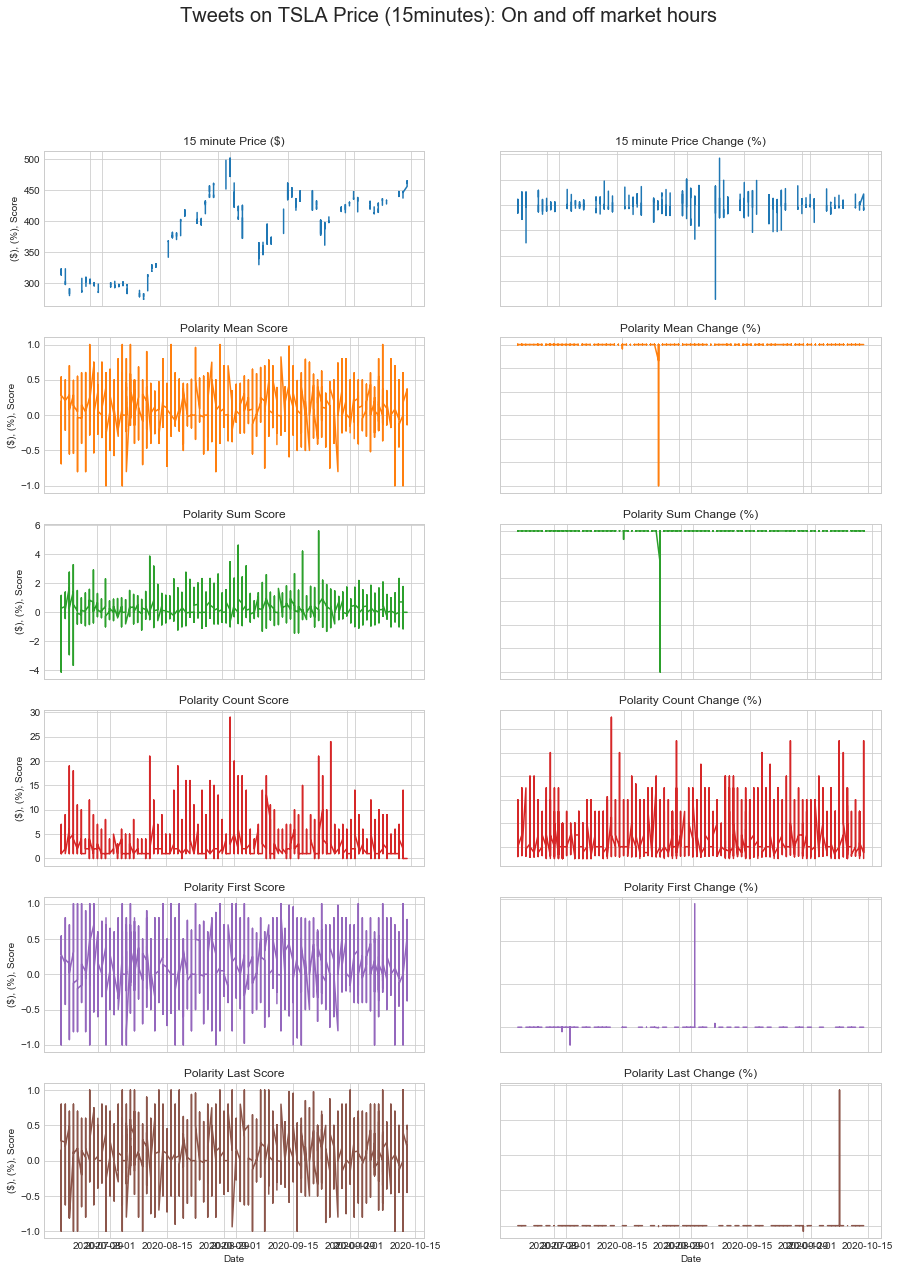

In [88]:
# plot total overviews
date_only = df_data.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Tweets on TSLA Price (15minutes): On and off market hours', fontsize=20)

axs[0, 0].plot(date_only, df_data['Close'])
axs[0, 0].set_title('15 minute Price ($)')
axs[1, 0].plot(date_only, df_data['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_data['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_data['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_data['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_data['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_data['15min return'])
axs[0, 1].set_title('15 minute Price Change (%)')
axs[1, 1].plot(date_only, df_data['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_data['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_data['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_data['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_data['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [89]:
correlation_data = df_data.corr()
correlation_data

Close  15min return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000      0.035979  0.061033     -0.062727      -0.029094      0.123349        0.180807       -0.040790      -0.015358             -0.041633            -0.016402               0.050438               0.030812              0.025257
15min return           0.035979      1.000000  0.562806     -0.015886      -0.017335      0.011463       -0.014535       -0.008833      -0.002193              0.071314             0.088881               0.008909               0.011674             -0.007841
tick                   0.061033      0.562806  1.000000      0.030106      -0.015696      0.031102        0.029713       -0.009647      -0.019985              0.032868             0.027196               0.017317               0.029998             -0.030002
Subjectivity          -0.062727     -0.015886  0.030106      1.000000       0.202501      0.120463       -0.041036        0.156358       0.131605              0.008712             0.009166              -0.016267              -0.006386             -0.004796
polarity mean         -0.029094     -0.017335 -0.015696      0.202501       1.000000      0.654196       -0.034985        0.724144       0.722206              0.021336             0.022302               0.000173               0.011320              0.004269
polarity sum           0.123349      0.011463  0.031102      0.120463       0.654196      1.000000        0.434593        0.469513       0.464455              0.016345             0.017288               0.181857               0.033624              0.020576
polarity count         0.180807     -0.014535  0.029713     -0.041036      -0.034985      0.434593        1.000000       -0.028923      -0.034494              0.006952             0.008357               0.359200               0.037525              0.020738
polarity first        -0.040790     -0.008833 -0.009647      0.156358       0.724144      0.469513       -0.028923        1.000000       0.302781              0.006334             0.007194               0.018534               0.030186             -0.005701
polarity last         -0.015358     -0.002193 -0.019985      0.131605       0.722206      0.464455       -0.034494        0.302781       1.000000              0.023824             0.024308              -0.005110               0.008863              0.014994
polarity mean change  -0.041633      0.071314  0.032868      0.008712       0.021336      0.016345        0.006952        0.006334       0.023824              1.000000             0.993285               0.009381               0.005140              0.001038
polarity sum change   -0.016402      0.088881  0.027196      0.009166       0.022302      0.017288        0.008357        0.007194       0.024308              0.993285             1.000000               0.009605               0.005144              0.001861
polarity count change  0.050438      0.008909  0.017317     -0.016267       0.000173      0.181857        0.359200        0.018534      -0.005110              0.009381             0.009605               1.000000              -0.000695              0.013217
polarity first change  0.030812      0.011674  0.029998     -0.006386       0.011320      0.033624        0.037525        0.030186       0.008863              0.005140             0.005144              -0.000695               1.000000             -0.000150
polarity last change   0.025257     -0.007841 -0.030002     -0.004796       0.004269      0.020576        0.020738       -0.005701       0.014994              0.001038             0.001861               0.013217              -0.000150              1.000000

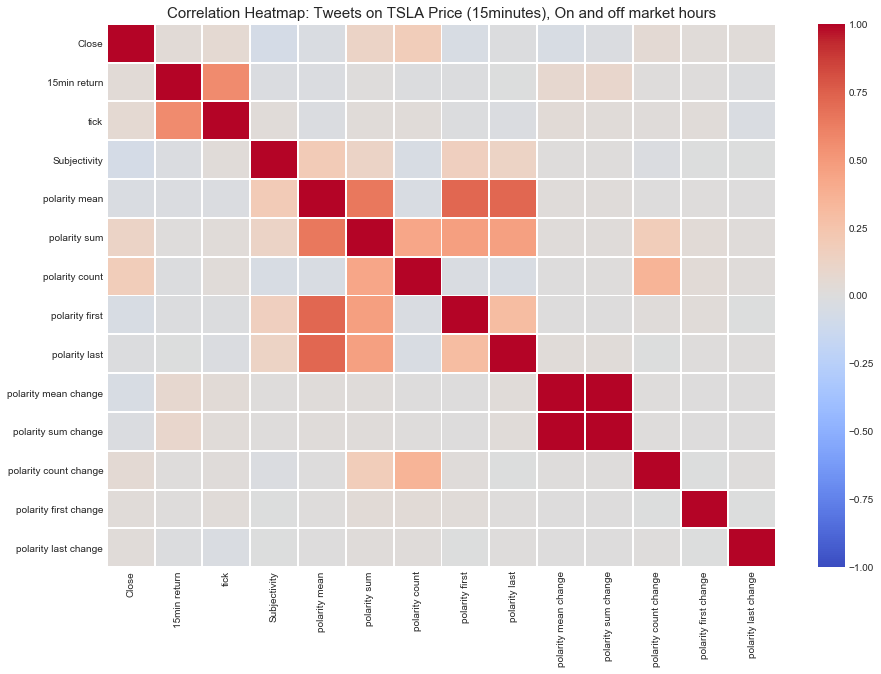

In [90]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap: Tweets on TSLA Price (15minutes), On and off market hours', fontsize=15)
sns.heatmap(correlation_data, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');

### 2. Using various sentiment score(Polarity only) for only the texts that matches with market hours. 

In [92]:
# Dropping unmatching rows 
df_2 = df_data.dropna()
df_2

Close  15min return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour minute                                                                                                                                                                                                                                         
2020-07-22 8    45      320.765991      0.007684   1.0      0.366071       0.067326      0.673258              10        0.000000  -3.125000e-01             -1.277990        -1.694976e+00               1.500000          -1.000000e+00         -6.153846e-01
           9    0       319.756012     -0.003149   0.0      0.490162      -0.009086     -0.072685               8        0.500000  -8.125000e-01             -1.134951        -1.107960e+00              -0.200000                    inf          1.600000e+00
                15      317.351990     -0.007518   0.0      0.636600      -0.292228     -2.922281              10        0.150000  -8.125000e-01             31.163703         3.920463e+01               0.250000          -7.000000e-01          0.000000e+00
                30      317.200012     -0.000479   0.0      0.266128       0.043468      0.130404               3        0.018182   1.500000e-01             -1.148747        -1.044624e+00              -0.700000          -8.787879e-01         -1.184615e+00
                45      314.821991     -0.007497   0.0      0.407672      -0.107672     -0.323016               3       -0.302778   1.047619e-01             -3.477039        -3.477039e+00               0.000000          -1.765278e+01         -3.015873e-01
           10   0       313.325989     -0.004752   0.0      0.594562      -0.159102     -0.795509               5        0.150000   1.500000e-01              0.477652         1.462754e+00               0.666667          -1.495413e+00          4.318182e-01
                15      316.834015      0.011196   1.0      0.391739      -0.022855     -0.228553              10        0.000000   1.875000e-01             -0.856348        -7.126953e-01               1.000000          -1.000000e+00          2.500000e-01
                30      317.649994      0.002575   1.0      0.529924      -0.068087     -0.272348               4       -0.059848  -8.125000e-01              1.979047         1.916187e-01              -0.600000                   -inf         -5.333333e+00
                45      316.622009     -0.003236   0.0      0.312381       0.105714      0.740000               7        0.000000   1.400000e-01             -2.552633        -3.717107e+00               0.750000          -1.000000e+00         -1.172308e+00
           11   0       316.800018      0.000562   1.0      0.365228       0.201339      1.208036               6        0.050000   3.166667e-01              0.904561         6.324807e-01              -0.142857                    inf          1.261905e+00
                15      317.595001      0.002509   1.0      0.500992      -0.087996     -0.527976               6       -0.090476  -8.125000e-01             -1.437053        -1.437053e+00               0.000000          -2.809524e+00         -3.565789e+00
                30      317.408020     -0.000589   0.0      0.519833       0.184500      2.767500              15        0.000000  -1.250000e-01             -3.096685        -6.241714e+00               1.500000          -1.000000e+00         -8.461538e-01
                45      317.026001     -0.001204   0.0      0.474551       0.280051      2.520455               9        0.375000   4.500000e-01              0.517889        -8.926665e-02              -0.400000                    inf         -4.600000e+00
           12   0       317.115997      0.000284   1.0      0.443601      -0.021875     -0.175000               8        0.250000   2.000000e-01             -1.078111        -1.069432e+00  

In [93]:
# # plot polarity mean change vs hourly return
# date_only = df_2.index.get_level_values(0)

# fig, ax1 = plt.subplots(figsize=(15,6))

# ax2 = ax1.twinx()
# ax1.plot(date_only, df_2['Close'], color='g')
# ax2.plot(date_only, df_2['polarity count'], color='b', alpha=0.4)

# ax1.set_xlabel('Date')
# ax1.set_ylabel('15min Price Change (%)', color='g')
# ax2.set_ylabel('Polarity Score Change (%)', color='b')
# ax1.set_xticklabels(date_only, rotation=45, size=8)

# fig.show();

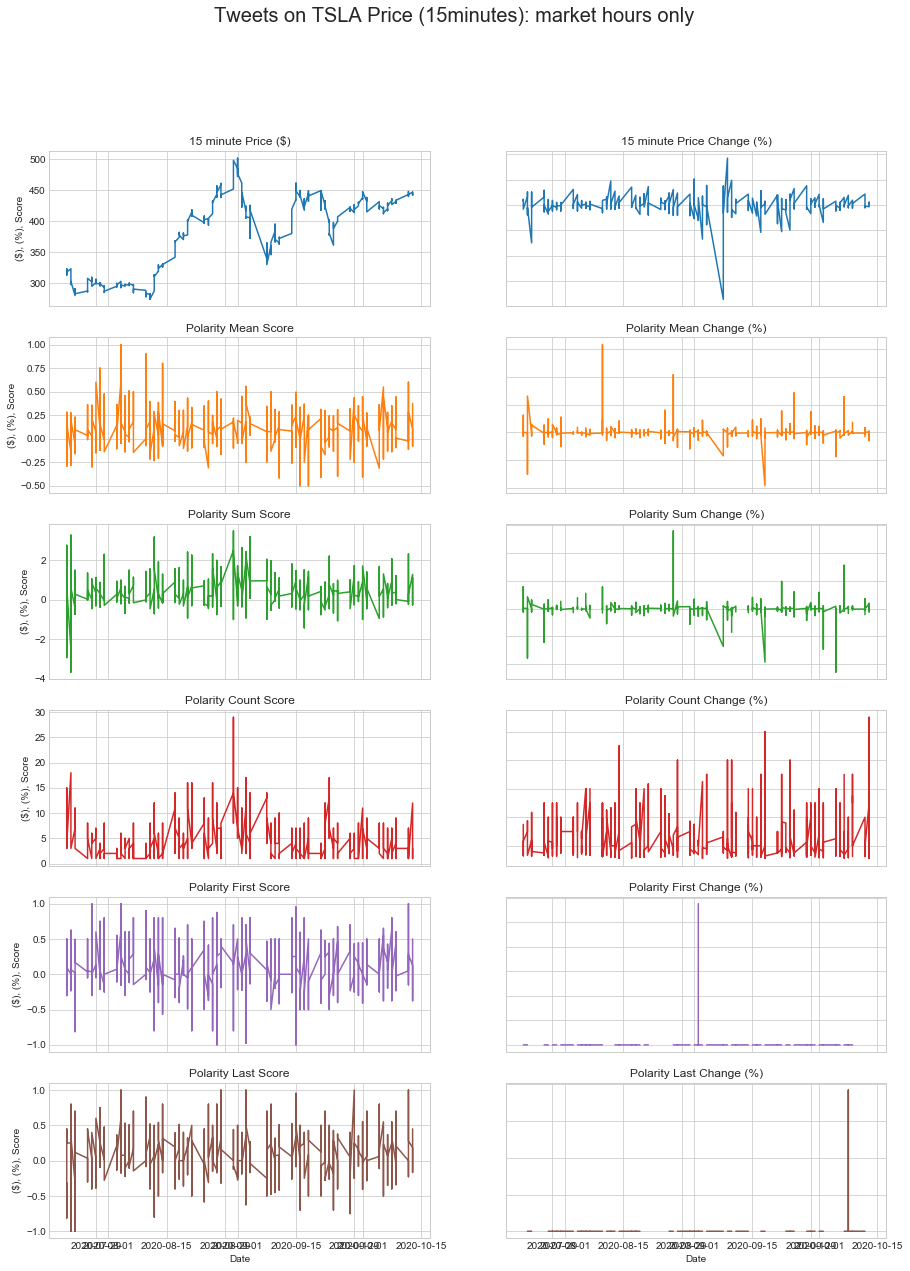

In [94]:
# plot total overviews
date_only = df_2.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('Tweets on TSLA Price (15minutes): market hours only', fontsize=20)

axs[0, 0].plot(date_only, df_2['Close'])
axs[0, 0].set_title('15 minute Price ($)')
axs[1, 0].plot(date_only, df_2['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_2['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_2['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_2['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_2['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_2['15min return'])
axs[0, 1].set_title('15 minute Price Change (%)')
axs[1, 1].plot(date_only, df_2['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_2['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_2['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_2['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_2['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
# date_only = df_2.index.get_level_values(0)

# fig, axs = plt.subplots(2, 2, figsize=(15,6))
# axs[0, 0].plot(date_only, df_2['Close'])
# axs[0, 0].set_title('15min Price ($)')
# axs[1, 0].plot(date_only, df_2['polarity count'], 'tab:red')
# axs[1, 0].set_title('Polarity Count Score')

# axs[0, 1].plot(date_only, df_2['15min return'])
# axs[0, 1].set_title('15 minute Price Change (%)')
# axs[1, 1].plot(date_only, df_2['polarity count change'], 'tab:red')
# axs[1, 1].set_title('Polarity Count Change (%)')


# for ax in axs.flat:
#     ax.set(xlabel='Date', ylabel='($), (%), Score')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [95]:
correlation_2 = df_2.corr()
correlation_2

Close  15min return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000      0.019400  0.038457     -0.050822      -0.029628      0.120181        0.171573       -0.035639      -0.003151             -0.031062             0.000878               0.005880               0.034812              0.028502
15min return           0.019400      1.000000  0.553663     -0.024813      -0.028730     -0.022415       -0.030853       -0.006222       0.003913              0.079838             0.106221              -0.010860               0.011959             -0.008498
tick                   0.038457      0.553663  1.000000      0.030499      -0.023331      0.011124        0.021353       -0.003608      -0.026241              0.027364             0.011548              -0.010434               0.032648             -0.032867
Subjectivity          -0.050822     -0.024813  0.030499      1.000000       0.214502      0.095474       -0.094349        0.139163       0.099608              0.021404            -0.002646              -0.070369              -0.004043             -0.014671
polarity mean         -0.029628     -0.028730 -0.023331      0.214502       1.000000      0.638252       -0.087905        0.586183       0.618105              0.092217             0.062918              -0.046939               0.008596              0.010816
polarity sum           0.120181     -0.022415  0.011124      0.095474       0.638252      1.000000        0.409433        0.371368       0.414168              0.032216             0.028031               0.095097               0.047967              0.029563
polarity count         0.171573     -0.030853  0.021353     -0.094349      -0.087905      0.409433        1.000000       -0.037707      -0.033442             -0.088953            -0.053226               0.264753               0.049250              0.022945
polarity first        -0.035639     -0.006222 -0.003608      0.139163       0.586183      0.371368       -0.037707        1.000000       0.162765              0.058582             0.036216              -0.020014               0.055049             -0.014575
polarity last         -0.003151      0.003913 -0.026241      0.099608       0.618105      0.414168       -0.033442        0.162765       1.000000              0.032752             0.010556              -0.005607               0.005517              0.033511
polarity mean change  -0.031062      0.079838  0.027364      0.021404       0.092217      0.032216       -0.088953        0.058582       0.032752              1.000000             0.775340              -0.072284               0.015013             -0.000807
polarity sum change    0.000878      0.106221  0.011548     -0.002646       0.062918      0.028031       -0.053226        0.036216       0.010556              0.775340             1.000000              -0.018396               0.014491              0.004453
polarity count change  0.005880     -0.010860 -0.010434     -0.070369      -0.046939      0.095097        0.264753       -0.020014      -0.005607             -0.072284            -0.018396               1.000000              -0.007932              0.027423
polarity first change  0.034812      0.011959  0.032648     -0.004043       0.008596      0.047967        0.049250        0.055049       0.005517              0.015013             0.014491              -0.007932               1.000000             -0.001295
polarity last change   0.028502     -0.008498 -0.032867     -0.014671       0.010816      0.029563        0.022945       -0.014575       0.033511             -0.000807             0.004453               0.027423              -0.001295              1.000000

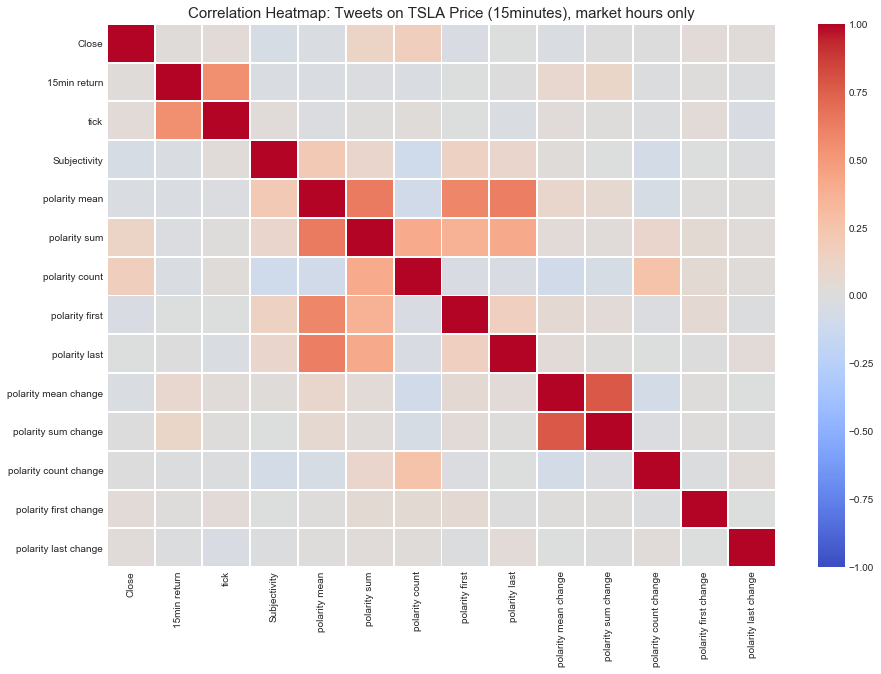

In [96]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap: Tweets on TSLA Price (15minutes), market hours only', fontsize=15)
sns.heatmap(correlation_2, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');